In [1]:
import matplotlib.pyplot as plt
import os
from urllib.parse import urlparse
import pandas as pd
import random

In [2]:
import numpy as np
imagenes = np.loadtxt("20_images.txt", dtype="str")
imagenes

array(['https://i.ytimg.com/vi/bDPkImgNs8Y/maxresdefault.jpg',
       'https://e00-marca.uecdn.es/albumes/2014/11/18/comics_nba/1416295630_extras_albumes_0_980.jpg',
       'https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/fairy-tail-natsu-padres-1559572361.png',
       'https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Jacques-Louis_David_-_The_Emperor_Napoleon_in_His_Study_at_the_Tuileries_-_Google_Art_Project.jpg/800px-Jacques-Louis_David_-_The_Emperor_Napoleon_in_His_Study_at_the_Tuileries_-_Google_Art_Project.jpg',
       'https://upload.wikimedia.org/wikipedia/en/e/e9/Hakusho_gamelogo.jpg',
       'https://assets.mycast.io/actor_images/actor-perfect-cell-205160_large.jpg?1619298196',
       'https://www.rd.com/wp-content/uploads/2019/01/shutterstock_673465372.jpg?fit=700,467',
       'https://static9.depositphotos.com/1010305/1139/i/600/depositphotos_11390423-stock-photo-kitten-on-a-white-background.jpg',
       'https://wallpaper.dog/large/20523050.png',
    

In [3]:
nom_img = []
for i in range(20):
    a = urlparse(imagenes[i])                 
    nom_img.append(os.path.basename(a.path)) 

In [4]:
for i in range(20):
    os.system(f'curl -o {nom_img[i]} {imagenes[i]}')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 99736  100 99736    0     0   470k      0 --:--:-- --:--:-- --:--:--  468k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  143k  100  143k    0     0  1576k      0 --:--:-- --:--:-- --:--:-- 1576k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1365k  100 1365k    0     0  2881k      0 --:--:-- --:--:-- --:--:-- 2881k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  215k  100  215k    0     0   841k      0 --:--:-- --:--:-- --:--:--  838k
  % Total    % Received % Xferd  Average Speed   Tim

In [4]:
nom_img

['maxresdefault.jpg',
 '1416295630_extras_albumes_0_980.jpg',
 'fairy-tail-natsu-padres-1559572361.png',
 '800px-Jacques-Louis_David_-_The_Emperor_Napoleon_in_His_Study_at_the_Tuileries_-_Google_Art_Project.jpg',
 'Hakusho_gamelogo.jpg',
 'actor-perfect-cell-205160_large.jpg',
 'shutterstock_673465372.jpg',
 'depositphotos_11390423-stock-photo-kitten-on-a-white-background.jpg',
 '20523050.png',
 '41b9u-1yUVS._AC_.jpg',
 'cthulhu-2.jpg',
 'il_1080xN.3926159075_hj39.jpg',
 'fan-art-chihiro-7.jpg',
 '557b36ec0911375e91f88c45b9e30a92--batman-animado-chibi.jpg',
 'il_fullxfull.4384629284_5nk6.jpg',
 'CEIJaGZP_400x400.jpg',
 'Bart_Simpson_200px.png',
 'tvkk3sxgp8181.png',
 'eed60545d30bafa2dd7ce23e9c076801--los-simpsons-cartoon-characters.jpg',
 'elephant-297205_960_720-768x558.png']

In [5]:
from joblib import Parallel, delayed

def vector(x):
    return plt.imread(x)

resVec = Parallel(n_jobs=4)(delayed(vector)(i) for i in nom_img)

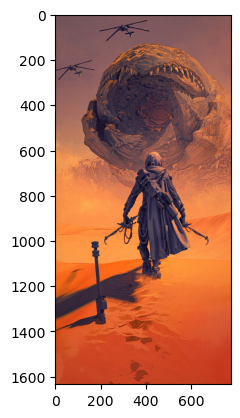

In [6]:

plt.imshow(resVec[8])
plt.show()

In [9]:
def color(x):
    return x.mean(axis=0).mean(axis=0)

resCol = Parallel(n_jobs=4)(delayed(color)(i) for i in resVec)

In [10]:
resCol

[array([85.40168077, 64.06505534, 57.16406141]),
 array([184.90649351, 153.63449897, 149.97998166]),
 array([0.9260053 , 0.48560145, 0.22606303], dtype=float32),
 array([68.20507871, 54.8705238 , 34.5187069 ]),
 array([189.93494923, 197.47972718, 204.6371998 ]),
 array([100.33758607, 105.72625978, 103.55450313]),
 array([177.7935026 , 144.81677577, 115.53339247]),
 array([218.2867    , 213.82773889, 211.73240278]),
 array([0.65925187, 0.3563062 , 0.2546971 , 1.        ], dtype=float32),
 array([200.39548319, 196.50011023, 198.83081751]),
 array([ 43.83075913,  96.52728153, 103.8861138 ]),
 array([204.60778635, 203.90053412, 207.10426783]),
 array([138.8337538 , 124.15122204,  76.02179817]),
 array([180.11932533, 179.23548863, 178.77003507]),
 array([227.73297305, 210.14627047, 213.49762284]),
 array([143.6885125 , 102.73680625,  51.995775  ]),
 array([0.18566377, 0.16046605, 0.09303961, 0.25329748], dtype=float32),
 array([0.8195761 , 0.7552455 , 0.63025326, 0.99977547], dtype=float32)

In [27]:
def genCol(x):
    r = np.random.randint(0,2)
    res = x.copy()
    res[:,:,r] = 0
    return res

newVec = Parallel(n_jobs=4)(delayed(genCol)(i)for i in resVec)

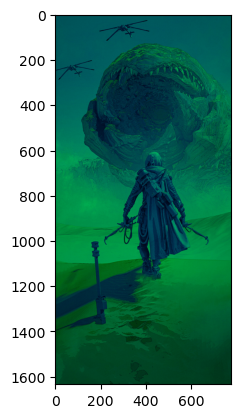

In [28]:
plt.imshow(newVec[8])
plt.show()

In [29]:
newCol = Parallel(n_jobs=4)(delayed(color)(i) for i in newVec)

In [30]:
datos = {'Imagen': imagenes[:20],
        'Antiguo Color': resCol,
        'Nuevo Color': newCol}
df_img = pd.DataFrame(datos)
df_img

,Imagen,Antiguo Color,Nuevo Color
0,https://i.ytimg.com/vi/bDPkImgNs8Y/maxresdefau...,"[85.40168077256949, 64.06505533854175, 57.1640...","[0.0, 64.06505533854175, 57.164061414930565]"
1,https://e00-marca.uecdn.es/albumes/2014/11/18/...,"[184.9064935064933, 153.63449896812665, 149.97...","[184.9064935064933, 0.0, 149.97998165558366]"
2,https://hips.hearstapps.com/hmg-prod.s3.amazon...,"[0.9260053, 0.48560145, 0.22606303]","[0.9260053, 0.48560145, 0.0]"
3,https://upload.wikimedia.org/wikipedia/commons...,"[68.20507871064473, 54.87052380059979, 34.5187...","[0.0, 54.87052380059979, 34.5187068965517]"
4,https://upload.wikimedia.org/wikipedia/en/e/e9...,"[189.93494923463157, 197.47972717780118, 204.6...","[189.93494923463157, 197.47972717780118, 0.0]"
5,https://assets.mycast.io/actor_images/actor-pe...,"[100.3375860719874, 105.72625978090753, 103.55...","[0.0, 105.72625978090753, 103.55450312989043]"
6,https://www.rd.com/wp-content/uploads/2019/01/...,"[177.79350260018344, 144.81677577240754, 115.5...","[177.79350260018344, 0.0, 115.53339247476286]"
7,https://static9.depositphotos.com/1010305/1139...,"[218.28670000000002, 213.82773888888892, 211.7...","[0.0, 213.82773888888892, 211.73240277777765]"
8,https://wallpaper.dog/large/20523050.png,"[0.65925187, 0.3563062, 0.2546971, 1.0]","[0.0, 0.3563062, 0.2546971, 1.0]"
9,https://m.media-amazon.com/images/I/41b9u-1yUV...,"[200.3954831932773, 196.50011022927677, 198.83...","[200.3954831932773, 0.0, 198.83081751219007]"


In [33]:
df_img['Diff Color'] = df_img['Antiguo Color'] - df_img['Nuevo Color']

In [34]:
df_img

,Imagen,Antiguo Color,Nuevo Color,Diff Color
0,https://i.ytimg.com/vi/bDPkImgNs8Y/maxresdefau...,"[85.40168077256949, 64.06505533854175, 57.1640...","[0.0, 64.06505533854175, 57.164061414930565]","[85.40168077256949, 0.0, 0.0]"
1,https://e00-marca.uecdn.es/albumes/2014/11/18/...,"[184.9064935064933, 153.63449896812665, 149.97...","[184.9064935064933, 0.0, 149.97998165558366]","[0.0, 153.63449896812665, 0.0]"
2,https://hips.hearstapps.com/hmg-prod.s3.amazon...,"[0.9260053, 0.48560145, 0.22606303]","[0.9260053, 0.48560145, 0.0]","[0.0, 0.0, 0.22606303]"
3,https://upload.wikimedia.org/wikipedia/commons...,"[68.20507871064473, 54.87052380059979, 34.5187...","[0.0, 54.87052380059979, 34.5187068965517]","[68.20507871064473, 0.0, 0.0]"
4,https://upload.wikimedia.org/wikipedia/en/e/e9...,"[189.93494923463157, 197.47972717780118, 204.6...","[189.93494923463157, 197.47972717780118, 0.0]","[0.0, 0.0, 204.63719979560554]"
5,https://assets.mycast.io/actor_images/actor-pe...,"[100.3375860719874, 105.72625978090753, 103.55...","[0.0, 105.72625978090753, 103.55450312989043]","[100.3375860719874, 0.0, 0.0]"
6,https://www.rd.com/wp-content/uploads/2019/01/...,"[177.79350260018344, 144.81677577240754, 115.5...","[177.79350260018344, 0.0, 115.53339247476286]","[0.0, 144.81677577240754, 0.0]"
7,https://static9.depositphotos.com/1010305/1139...,"[218.28670000000002, 213.82773888888892, 211.7...","[0.0, 213.82773888888892, 211.73240277777765]","[218.28670000000002, 0.0, 0.0]"
8,https://wallpaper.dog/large/20523050.png,"[0.65925187, 0.3563062, 0.2546971, 1.0]","[0.0, 0.3563062, 0.2546971, 1.0]","[0.65925187, 0.0, 0.0, 0.0]"
9,https://m.media-amazon.com/images/I/41b9u-1yUV...,"[200.3954831932773, 196.50011022927677, 198.83...","[200.3954831932773, 0.0, 198.83081751219007]","[0.0, 196.50011022927677, 0.0]"


In [10]:
### Los pasos que tengan * se deben hacer de manera paralelizada

## Primer paso: cargar los links desde un archivo txt a un arreglo
## *Segundo paso: transformar las imagenes a vectores 
## *Tercer paso: obtener el primer color de la imagen que se obtiene de: colors = np.unique(imagen.reshape(-1, imagen.shape[2]), axis=0)
## *Cuarto paso: cambiar el color de la imagen a un color random
## Quinto paso: hacer un dataframe que tenga el link de la imagen con una columna llamada url, su antiguo color con columna llamada 
## oldcolor y su nuevo color con columna llamada newcolor
## *Sexto paso: hacer una columna nueva que tenga diffcolor como la diferencia numerica entre newcolor y oldcolor